## 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from numpy import unique
from numpy import reshape
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling1D, Dropout
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import classification_report

In [2]:
#Create a path to where the data is stored.
path = r'/Users/vicky/OneDrive/文件/careerfoundry/Machine Learning with Python/Datasets'

In [3]:
# Ensures the charts created are displayed in the notebook without the need to "call" them.
%matplotlib inline

In [4]:
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path,'Dataset-weather-prediction-dataset-processed.csv'))
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [5]:
#Read in the pleasant weather data.
pleasant = pd.read_csv(os.path.join(path,'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Data Cleaning

In [6]:
# remove 3 non-pertinent columns (GDANSK, ROMA & TOURS) Date, and Month
df = climate.drop(['DATE','MONTH',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max'], axis=1)

In [7]:
df

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,6.5,0.8,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,6.1,3.3,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,8.5,5.1,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,6.3,3.8,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,3.0,-0.7,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,15.9,11.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,16.7,14.3,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,16.7,13.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,15.4,11.6,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [8]:
list(df.columns)

['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_

In [9]:
# Based on observation some weather station are missing wind_speed and snow_depth. Drop these two observations for all Weather Stations.
df = df.drop(columns=df.filter(like='_snow_depth').columns)
df = df.drop(columns=df.filter(like='_wind_speed').columns)

In [10]:
df

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,1,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,6,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,6,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6,8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4,2,...,14.2,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22946,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9,0,...,14.3,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22947,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4,2,...,14.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22948,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1,1,...,12.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5


In [11]:
list(df.columns)

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',


In [12]:
#Kassel is missing cloud_cover observations and we will use Ljubljana data to fill in
# Munchen is missing pressure and we will use Sonnblick data to fill in
# Stockholm is missing humidity nd we will use Olso data to fill in
df['KASSEL_cloud_cover'] = df['LJUBLJANA_cloud_cover']
df['MUNCHENB_pressure'] = df['SONNBLICK_pressure']
df['STOCKHOLM_humidity'] = df['OSLO_humidity']

In [13]:
# Sort index
df = df.sort_index(axis=1)
list(df.columns)

['BASEL_cloud_cover',
 'BASEL_global_radiation',
 'BASEL_humidity',
 'BASEL_precipitation',
 'BASEL_pressure',
 'BASEL_sunshine',
 'BASEL_temp_max',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BELGRADE_cloud_cover',
 'BELGRADE_global_radiation',
 'BELGRADE_humidity',
 'BELGRADE_precipitation',
 'BELGRADE_pressure',
 'BELGRADE_sunshine',
 'BELGRADE_temp_max',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_global_radiation',
 'BUDAPEST_humidity',
 'BUDAPEST_precipitation',
 'BUDAPEST_pressure',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_max',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'DEBILT_cloud_cover',
 'DEBILT_global_radiation',
 'DEBILT_humidity',
 'DEBILT_precipitation',
 'DEBILT_pressure',
 'DEBILT_sunshine',
 'DEBILT_temp_max',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_humidity',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_pressure',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_max',
 

In [14]:
df

,BASEL_cloud_cover,BASEL_global_radiation,BASEL_humidity,BASEL_precipitation,BASEL_pressure,BASEL_sunshine,BASEL_temp_max,BASEL_temp_mean,BASEL_temp_min,BELGRADE_cloud_cover,...,STOCKHOLM_temp_min,VALENTIA_cloud_cover,VALENTIA_global_radiation,VALENTIA_humidity,VALENTIA_precipitation,VALENTIA_pressure,VALENTIA_sunshine,VALENTIA_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min
0,7,0.32,0.85,0.09,1.0180,0.7,10.9,6.5,0.8,1,...,2.2,5,0.45,0.88,0.34,1.0003,4.7,10.9,8.5,6.0
1,6,0.36,0.84,1.05,1.0180,1.1,10.1,6.1,3.3,6,...,3.0,7,0.25,0.91,0.84,1.0007,0.7,12.1,8.9,5.6
2,8,0.18,0.90,0.30,1.0180,0.0,9.9,8.5,5.1,6,...,1.3,7,0.17,0.91,0.08,1.0096,0.1,12.9,10.5,8.1
3,3,0.58,0.92,0.00,1.0180,4.1,10.6,6.3,3.8,8,...,0.4,7,0.13,0.86,0.98,1.0184,0.0,10.6,7.4,7.3
4,6,0.65,0.95,0.14,1.0180,5.4,6.0,3.0,-0.7,8,...,0.8,3,0.46,0.80,0.00,1.0328,5.7,8.4,5.7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,1,1.34,0.79,0.22,1.0248,7.7,21.4,15.9,11.4,2,...,8.2,5,1.13,0.82,0.41,1.0142,3.4,13.5,10.7,7.9
22946,6,1.34,0.77,0.22,1.0244,5.4,21.9,16.7,14.3,0,...,11.0,5,1.13,0.82,0.41,1.0142,3.4,13.5,10.7,7.9
22947,4,1.34,0.76,0.22,1.0227,6.1,22.4,16.7,13.1,2,...,12.1,5,1.13,0.82,0.41,1.0142,3.4,13.5,10.7,7.9
22948,5,1.34,0.80,0.22,1.0212,5.8,21.1,15.4,11.6,1,...,5.1,5,1.13,0.82,0.41,1.0142,3.4,13.5,10.7,7.9


In [15]:
df.to_csv(os.path.join(path,'climate_nodate_cleaned.csv'))

In [16]:
# remove Date column
pleasant = pleasant.drop(['DATE'], axis=1)

In [17]:
pleasant

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3. Reshape the data layers can be fed to the deep learning model 

In [18]:
# List of weather stations
weather_stations = [
    'BASEL_',
    'BELGRADE_',
    'BUDAPEST_',
    'DEBILT_',
    'DUSSELDORF_',
    'HEATHROW_',
    'KASSEL_',
    'LJUBLJANA_',
    'MAASTRICHT_',
    'MADRID_',
    'MUNCHENB_',
    'OSLO_',
    'SONNBLICK_',
    'STOCKHOLM_',
    'VALENTIA_']

In [19]:
# Dictionary mapping Each weather station result for confusion matrix
eather_outcomes = {
    0: 'BASEL_pleasant_weather',
    1: 'BELGRADE_pleasant_weather',
    2: 'BUDAPEST_pleasant_weather',
    3: 'DEBILT_pleasant_weather',
    4: 'DUSSELDORF_pleasant_weather',
    5: 'HEATHROW_pleasant_weather',
    6: 'KASSEL_pleasant_weather',
    7: 'LJUBLJANA_pleasant_weather',
    8: 'MAASTRICHT_pleasant_weather',
    9: 'MADRID_pleasant_weather',
    10: 'MUNCHENB_pleasant_weather',
    11: 'OSLO_pleasant_weather',
    12: 'SONNBLICK_pleasant_weather',
    13: 'STOCKHOLM_pleasant_weather',
    14: 'VALENTIA_pleasant_weather'}

In [20]:
# Reshape X
X = df.values.reshape(-1, 15, 9)

In [21]:
X.shape

(22950, 15, 9)

In [22]:
# Reshape y
y = pleasant.values.reshape(-1, 15)

In [23]:
y.shape

(22950, 15)

In [24]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [25]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 15, 9) (18360, 15)
(4590, 15, 9) (4590, 15)


In [26]:
X_train

array([[[  4.  ,   2.58,   0.68, ...,  25.9 ,  20.9 ,  16.4 ],
        [  1.  ,   3.12,   0.6 , ...,  30.  ,  24.  ,  16.  ],
        [  2.  ,   2.79,   0.65, ...,  30.8 ,  24.6 ,  18.8 ],
        ...,
        [  6.  ,   2.48,   0.96, ...,   7.8 ,   5.3 ,   2.7 ],
        [  6.  ,   2.28,   0.9 , ...,  23.  ,  15.8 ,  10.5 ],
        [  5.  ,   2.85,   0.81, ...,  15.5 ,  13.4 ,  11.2 ]],

       [[  0.  ,   1.  ,   0.74, ...,   4.1 ,  -1.2 ,  -5.1 ],
        [  2.  ,   1.23,   0.77, ...,   5.  ,   0.7 ,  -2.8 ],
        [  2.  ,   0.92,   0.61, ...,   6.2 ,   1.1 ,  -3.2 ],
        ...,
        [  1.  ,   1.23,   0.63, ..., -10.1 , -12.1 , -14.1 ],
        [  8.  ,   0.13,   0.97, ...,  -2.3 ,  -4.8 ,  -7.8 ],
        [  6.  ,   0.17,   0.77, ...,  10.2 ,   8.9 ,   7.6 ]],

       [[  3.  ,   3.03,   0.59, ...,  25.5 ,  20.2 ,  13.4 ],
        [  1.  ,   1.57,   0.68, ...,  30.1 ,  23.8 ,  17.6 ],
        [  4.  ,   1.41,   0.67, ...,  16.2 ,  11.7 ,   7.9 ],
        ...,
        [  7

In [27]:
len(X_train[0])

15

In [28]:
len(X_train[0][0])

9

In [29]:
len(y_train[0])

15

## 4. Build and run CNN Model

In [30]:
# Adjust model hyperparameters
epochs = 10
batch_size = 16
n_hidden = 64

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = len(y_train[0])

# Implement complex layers
model = Sequential()
model.add(Conv1D(n_hidden, kernel_size=2, activation='relu', input_shape=(timesteps, input_dim)))
model.add(Dense(16, activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax')) 

# Build model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\vicky\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Run model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/10
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0951 - loss: 12829.1016
Epoch 2/10
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1186 - loss: 195867.6094
Epoch 3/10
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1196 - loss: 564738.8750
Epoch 4/10
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1131 - loss: 1127031.0000
Epoch 5/10
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1131 - loss: 1955218.6250
Epoch 6/10
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1096 - loss: 2995716.7500
Epoch 7/10
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1023 - loss: 4404117.5000
Epoch 8/10
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1060 - loss: 5780305.0000
Epoch 9/10
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1093 - loss: 8321678.5000
Epoch 10/10
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1090 - loss: 10681034.0000


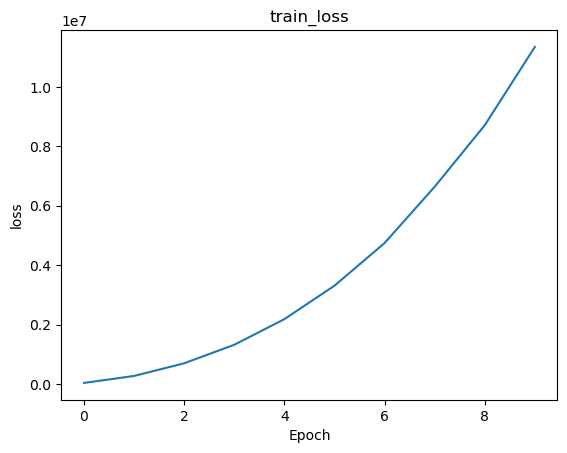

In [32]:
plt.title ('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])

In [33]:
# Adjust model hyperparameters and run again. 
# Adding Adam learning rate
epochs = 100
batch_size = 64
n_hidden = 64
optimizer = Adam(learning_rate=0.000001)

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = len(y_train[0])

# Implement complex layers
model = Sequential()
model.add(Conv1D(n_hidden, kernel_size=2, activation='relu', input_shape=(timesteps, input_dim)))
model.add(Dense(64, activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax')) 

# Build model
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])

In [34]:
# Run model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0506 - loss: 32.9815
Epoch 2/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0499 - loss: 32.0150
Epoch 3/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0534 - loss: 31.9635
Epoch 4/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0557 - loss: 30.9598
Epoch 5/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0577 - loss: 30.0344
Epoch 6/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0629 - loss: 29.7320
Epoch 7/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0622 - loss: 29.5016
Epoch 8/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0663 - loss: 29.3335
Epoch 9/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0646 - loss: 28.4008
Epoch 10/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0642 - loss: 28.8421
Epoch 11/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0620 - loss: 28.6184
Epoch 12/100
287/287 ━━━━━━━━━

In [35]:
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([weather_stations[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([weather_stations[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [36]:
# Evaluate
print(confusion_matrix(y_test, model.predict(X_test)))

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Pred         BASEL_  BELGRADE_  BUDAPEST_  DUSSELDORF_  HEATHROW_  LJUBLJANA_  \
True                                                                            
BASEL_          165        317        116           67         63        1309   
BELGRADE_         0          1          0            1          0         595   
BUDAPEST_         0          1          1            0          0         118   
DEBILT_           0          0          0            0          0          54   
DUSSELDORF_       0          0          0            0          0          26   
HEATHROW_         0          0          1            0          0          64   
KASSEL_           0          0          0            0          0           7   
LJUBLJANA_        0          0          0            0          0          30   
MAASTRICHT_       0          0          0            0          0           3   
MADRID_           0         17         26            1          7   

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 14, 64)         │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 14, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 448)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │         6,735 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,335 (141.94 KB)

 Trainable params: 12,111 (47.31 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,224 (94.63 KB)